<a href="https://colab.research.google.com/github/kamblechand/capstone-project-1--hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_directory='/content/drive/MyDrive/alma/projectfiles/'
df=pd.read_csv(working_directory+'Hotel Bookings.csv')
df.head(100)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Resort Hotel,1,72,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,73.80,0,1,Canceled,2015-06-29
96,Resort Hotel,1,63,2015,July,27,3,2,5,2,...,No Deposit,242.0,NaN,0,Transient,117.00,0,1,Canceled,2015-05-13
97,Resort Hotel,0,63,2015,July,27,3,2,5,3,...,No Deposit,105.0,NaN,0,Transient,196.54,0,1,Check-Out,2015-07-10
98,Resort Hotel,0,101,2015,July,27,3,2,5,2,...,No Deposit,240.0,NaN,0,Transient,99.30,1,2,Check-Out,2015-07-10


In [4]:
df.tail(100)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119290,City Hotel,0,218,2017,August,34,26,2,5,2,...,No Deposit,7.0,NaN,0,Transient,111.92,0,4,Check-Out,2017-09-02
119291,City Hotel,0,218,2017,August,34,26,2,5,1,...,No Deposit,7.0,NaN,0,Transient,105.34,0,4,Check-Out,2017-09-02
119292,City Hotel,0,75,2017,August,34,23,2,8,2,...,No Deposit,394.0,NaN,0,Transient,81.00,0,0,Check-Out,2017-09-02
119293,City Hotel,0,243,2017,August,35,30,0,3,2,...,No Deposit,9.0,NaN,0,Transient,189.00,0,3,Check-Out,2017-09-02
119294,City Hotel,0,243,2017,August,35,30,0,3,2,...,No Deposit,9.0,NaN,0,Transient,117.00,0,1,Check-Out,2017-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
df['country'].unique()#total no of countries visited the hotel

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

## **Data cleaning.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.shape

(119390, 32)

In [8]:
df.isnull().sum()#total no of missing values.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df['country'].fillna(0,inplace=True)
df['children'].fillna(0,inplace=True)
df['company'].fillna(0,inplace=True)
df['agent'].fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Total no of city hotel and resort hotel.



In [11]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

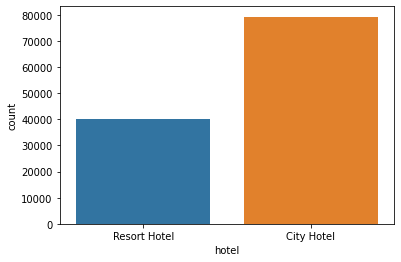

In [12]:
sns.countplot(x='hotel',data=df)#rh type have 40000 n ch have 80000 bookings
plt.show()

### Types of meals mostly preffered.

In [13]:
dailymeal=df['meal'].value_counts()
dailymeal

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Text(0.5, 0, 'MEAL')

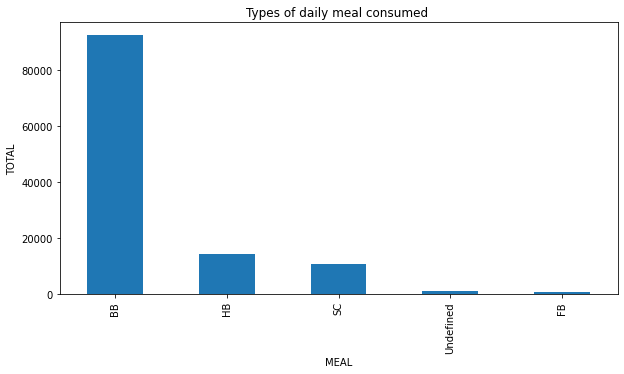

In [14]:
dailymeal.plot(kind='bar',figsize=(10,5))
#plt.plot(dailymeal)

plt.title('Types of daily meal consumed ')
plt.ylabel('TOTAL')
plt.xlabel('MEAL')


In [15]:
deposittype=df.groupby('hotel')['deposit_type'].value_counts()
deposittype

hotel         deposit_type
City Hotel    No Deposit      66442
              Non Refund      12868
              Refundable         20
Resort Hotel  No Deposit      38199
              Non Refund       1719
              Refundable        142
Name: deposit_type, dtype: int64

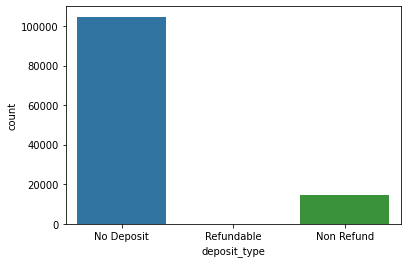

In [16]:

sns.countplot(x='deposit_type',data=df )

## cancellation ratio.

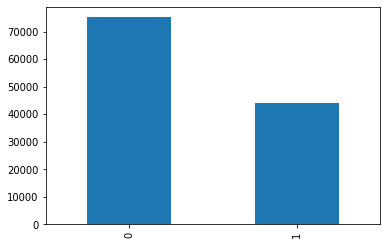

In [17]:
g=df['is_canceled'].value_counts()#0 denotes not_canceled,1 denotes  canceled
g.plot.bar()

### cancellation ratio in different hotels.

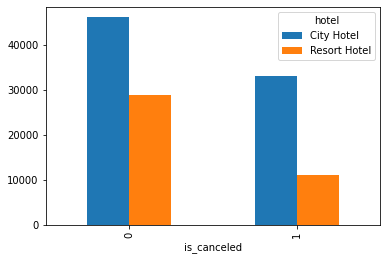

In [18]:

f=df.groupby(['is_canceled','hotel']).size().unstack()
f.plot(kind='bar')


In [19]:
df.groupby('arrival_date_month')['adr'].value_counts()

arrival_date_month  adr  
April               85.0     393
                    90.0     326
                    95.0     325
                    99.0     276
                    100.0    273
                            ... 
September           292.4      1
                    295.0      1
                    306.0      1
                    307.5      1
                    345.0      1
Name: adr, Length: 19968, dtype: int64

## yearly bookings

In [20]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'yearly_booking')

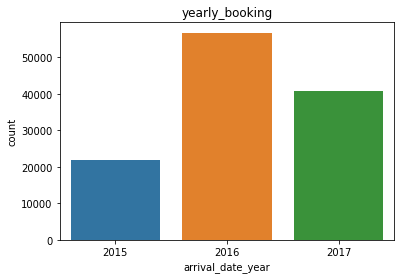

In [21]:
sns.countplot(x='arrival_date_year',data=df).set_title('yearly_booking')

In [22]:
a=df.groupby('hotel')['country'].value_counts()
a

hotel         country
City Hotel    PRT        30960
              FRA         8804
              DEU         6084
              GBR         5315
              ESP         4611
                         ...  
Resort Hotel  TGO            1
              TUN            1
              UGA            1
              UZB            1
              ZMB            1
Name: country, Length: 293, dtype: int64

## [1] **From where the most families are coming?**

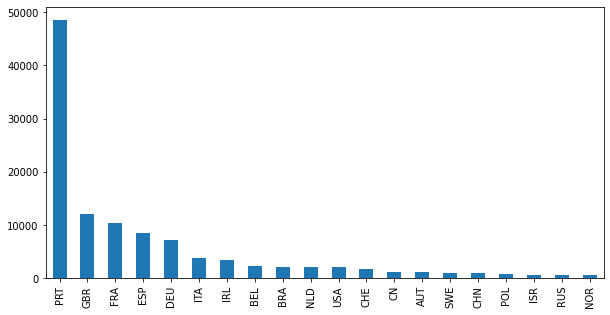

In [23]:
most_visited_people=df['country'].value_counts()[:20]
plt.figure(figsize=(10,5))
most_visited_people.plot.bar()


([<matplotlib.patches.Wedge at 0x7f203b11f490>,
 [Text(0.062019772033133976, 1.098250220977423, 'PRT'),
  Text(-1.0615450979524124, -0.28830887085416484, 'GBR'),
  Text(-0.6238094542805637, -0.9060142188454802, 'FRA'),
  Text(-0.012478781665171754, -1.0999292159080751, 'ESP'),
  Text(0.5106887486817722, -0.9742674180992844, 'DEU'),
  Text(0.8097068270855042, -0.7445635326626772, 'ITA'),
  Text(0.9540816597293056, -0.5474743706952626, 'IRL'),
  Text(1.0360099599401704, -0.3697071312603623, 'BEL'),
  Text(1.0779718294283671, -0.21903592161757285, 'BRA'),
  Text(1.097635840664098, -0.07208024201970305, 'NLD')],
 [Text(0.033828966563527615, 0.5990455750785942, '48.2%'),
  Text(-0.579024598883134, -0.15725938410227172, '12.0%'),
  Text(-0.34025970233485286, -0.4941895739157164, '10.3%'),
  Text(-0.006806608181002774, -0.5999613904953137, '8.5%'),
  Text(0.2785574992809666, -0.5314185916905187, '7.2%'),
  Text(0.4416582693193659, -0.4061255632705511, '3.7%'),
  Text(0.5204081780341666, -0.29

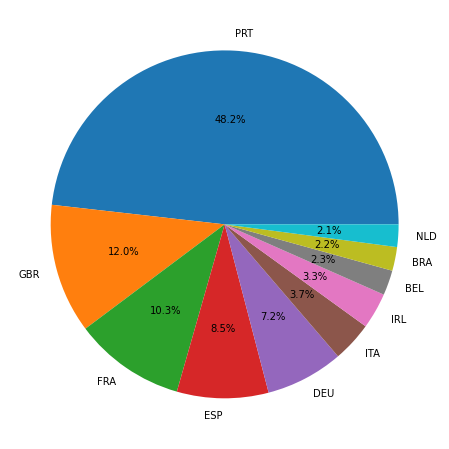

In [24]:
plt.figure(figsize=(8,8))
plt.pie(list(df['country'].value_counts()[0:10]),labels=list(df['country'].value_counts().keys()[0:10]),autopct='%0.1f%%')

inference: hotels have most visitors from PRT country . 

## **[2] No of days between the booking and arrival?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


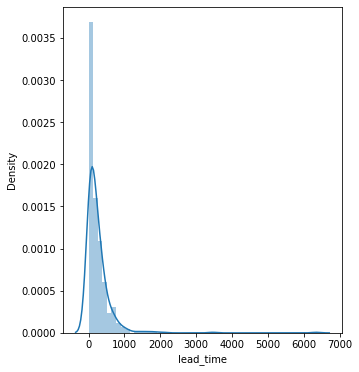

In [25]:
a=df['lead_time'].value_counts()
a
plt.figure(figsize=(5,6))
sns.distplot(a)

inference: max time and min taken by people from the date of booking to arrival time can be seen from above graph .

## **[3] which types of rooms are mostly booked?**

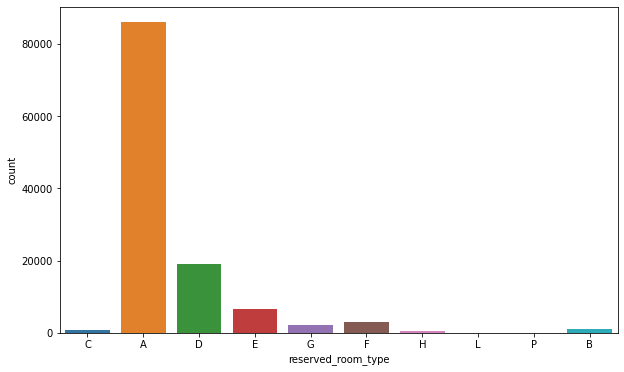

In [26]:

plt.figure(figsize=(10,6))
df['reserved_room_type'].value_counts()
sns.countplot(x='reserved_room_type',data=df)

plt.show()

inference : type A room are most preffered type by visitors to stay.

### **[4]  Hotels bookings according to market segments?**


In [27]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

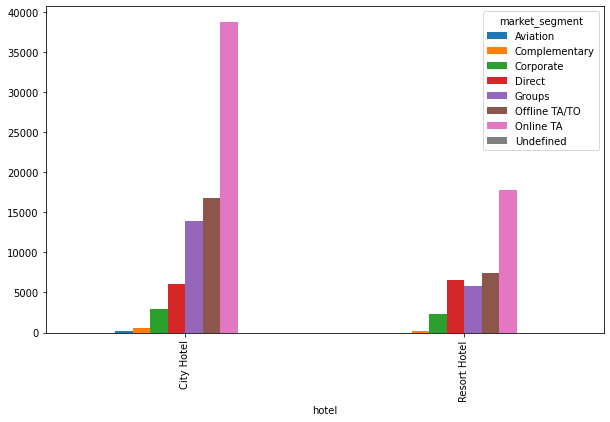

In [28]:
marketseg=df.groupby(['hotel','market_segment']).size().unstack()
marketseg.plot(kind='bar',figsize=(10,6))

inference: city hotels are mostly booked through onlin TA (travel agents) and offline travel agents.

### **[5] Most no of days in waiting list for different market segments?**

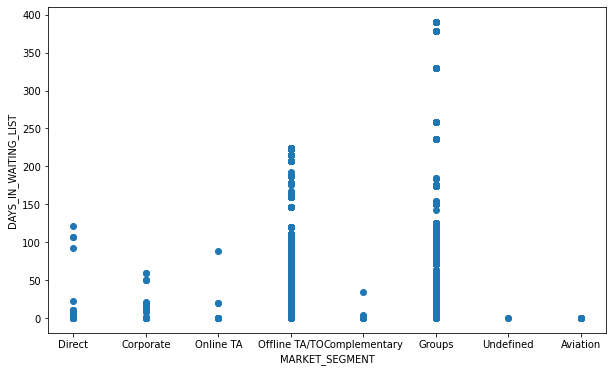

In [29]:
fig,b=plt.subplots(figsize=(10,6))#here waiting list for aviation type is very less
b.scatter(df['market_segment'],df['days_in_waiting_list'])
b.set_xlabel(('market_segment').upper())
b.set_ylabel(('days_in_waiting_list').upper())
plt.show()

inference: it can be clearly seen aviation segments have very less waiting time, offline TA/TO market segments and groups market segments have more waiting time.

## **[6] Total no of children,adults and babies visited the hotel?**

In [30]:
#total no of children,adults and babies visited the hotel.  

df[['adults','children','babies']].sum()


adults      221636.0
children     12403.0
babies         949.0
dtype: float64

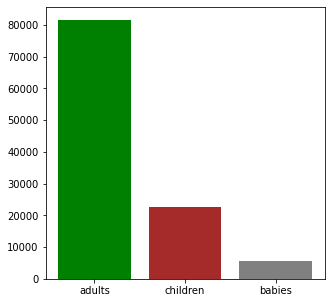

In [31]:
plt.figure(figsize=(5,5))
plt.bar(list(df[['adults','children','babies']].sum().keys()),list(df[['adults','children','babies']].value_counts()[0:3]),color=['green','brown','grey'])
plt.show()

In [32]:
df['no_of_people']=df['adults']+df['children']+df['babies']#here new column added of total no's of people.
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,no_of_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


inference: adults are mostly visited the hotel,adults :     221636.0,children :    12403.0, babies   :      949.0

### **[7]   Avg charges per night in different months.**

In [33]:
df['charges_per_member_night']=df['adr']/df['no_of_people']#

df.drop(df[((df['children']==0)&(df['babies']==0)&(df['adults']==0))].index,inplace=True)
o=df.groupby('arrival_date_month')['charges_per_member_night'].mean()
o

arrival_date_month
April        53.468996
August       65.623511
December     44.051358
February     41.869291
January      43.407665
July         60.843493
June         64.369229
March        45.891752
May          62.252077
November     47.076159
October      51.260244
September    58.748328
Name: charges_per_member_night, dtype: float64

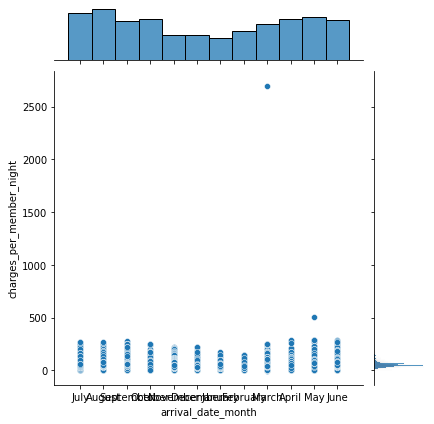

<Figure size 1800x648 with 0 Axes>

In [34]:

sns.jointplot(x='arrival_date_month',y='charges_per_member_night',data=df)

plt.figure(figsize=(25,9))
plt.show()

### **[8] hotels with the highest booking in months?**

In [35]:
df.groupby('arrival_date_month')['no_of_people'].value_counts()

arrival_date_month  no_of_people
April               2.0             7865
                    1.0             1880
                    3.0              953
                    4.0              369
                    5.0               11
                                    ... 
September           26.0               4
                    27.0               2
                    5.0                1
                    40.0               1
                    50.0               1
Name: no_of_people, Length: 71, dtype: int64

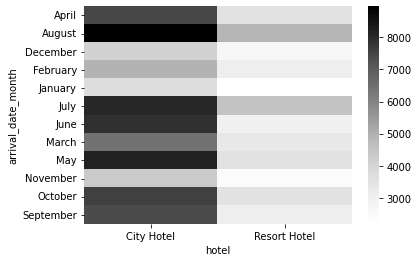

In [36]:
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap='Greys')

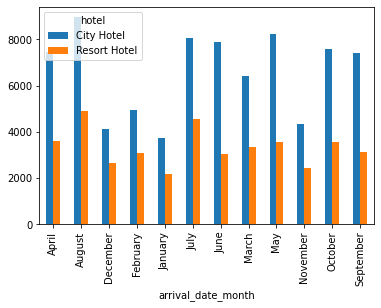

In [37]:

g=df.groupby(['arrival_date_month','hotel']).size().unstack()#Most no of booking inthe month of august ,city hotel is most prefered

g.plot(kind='bar')


inference: As compared to resort hotels city hotels are more booked in months (may,june,september,october) also hotels have fewer guest in the months of dec,feb,jan





### **[9]  hotel rates in different months.**

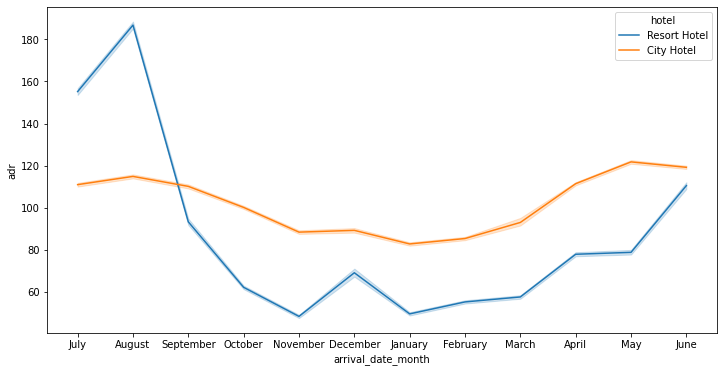

In [38]:
#this is a lineplot of the adr for different hotel types
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

inference: city hotel rate are cheaper in months of november to february
resort hotel rate are higher in months of july and august.  adr=average daily rates

### **[10] heatmap for the entire dataset.** 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,no_of_people,charges_per_member_night
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,...,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877,0.044826,0.019529
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,...,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949,0.070210,-0.126188
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,...,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610,0.052780,0.138801
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,...,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202,0.025752,0.053784
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,...,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026,0.006637,0.022844
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,...,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124,0.103938,-0.041267
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,...,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738,0.104519,-0.029308
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,...,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353,0.818861,-0.320915
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,...,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747,0.581591,-0.078930
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,...,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939,0.163270,-0.051928


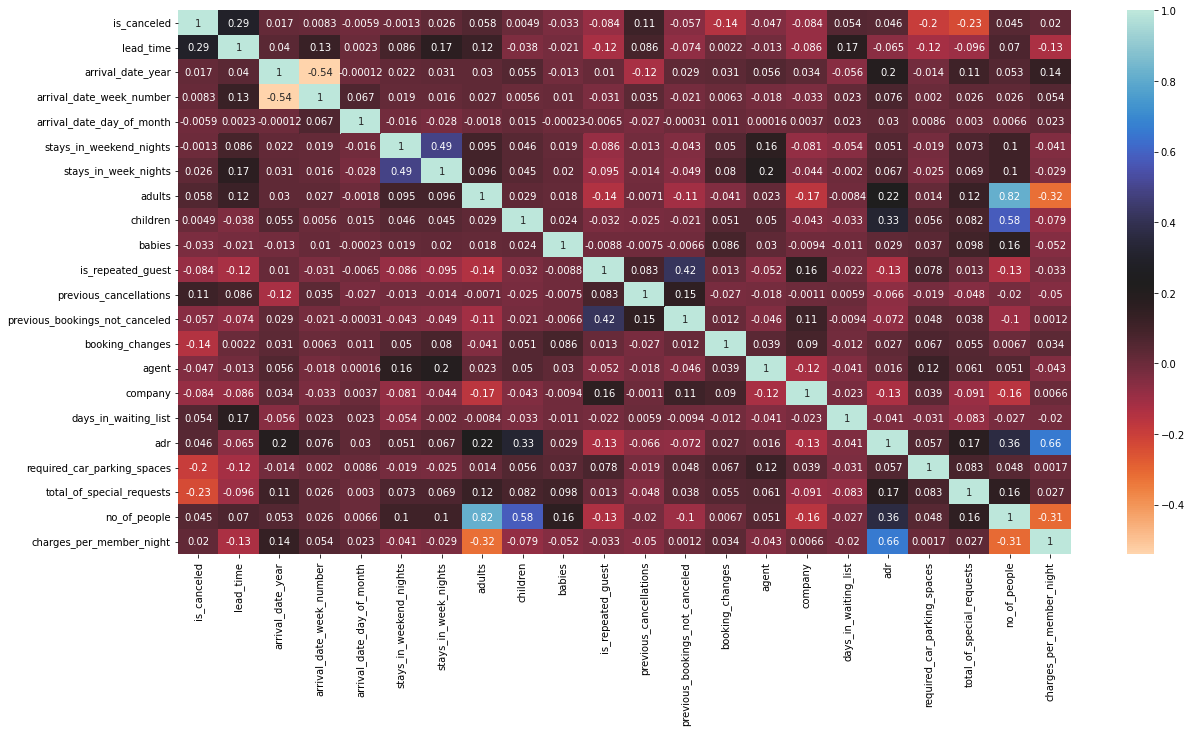

In [39]:
plt.figure(figsize=(20,10))
d=df.corr()
sns.heatmap(d,cmap='icefire_r',annot=True)
d

## *Thank you*